# Heart Disease Prediction - Final Project

In [2]:
# import thư viện
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Bài tập 1: (Data Analysis) hãy hoàn thiện chương trình sau sử dụng thư viện seaborn để hiện thị mối quan hệ giữa độ tuổi và khả năng bị bệnh tim. Ở đây, target = 1 ngụ ý rằng người đó đang bị bệnh tim và target = 0 ngụ ý rằng người đó không bị bệnh tim

In [3]:
%cd /content/drive/MyDrive/Colab/3.2.Heart_Disease_Prediction/data

/content/drive/MyDrive/Colab/3.2.Heart_Disease_Prediction/data


In [ ]:
# Download data
# https://drive.google.com/file/d/1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN/view
!gdown 1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: /content/drive/MyDrive/Colab/3.2.Heart_Disease_Prediction/data/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 29.7MB/s]


In [4]:
%cd ..

/content/drive/MyDrive/Colab/3.2.Heart_Disease_Prediction


In [5]:
# Bài tập 1
df = pd.read_csv('data/cleveland.csv', header = None)


In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [7]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [8]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


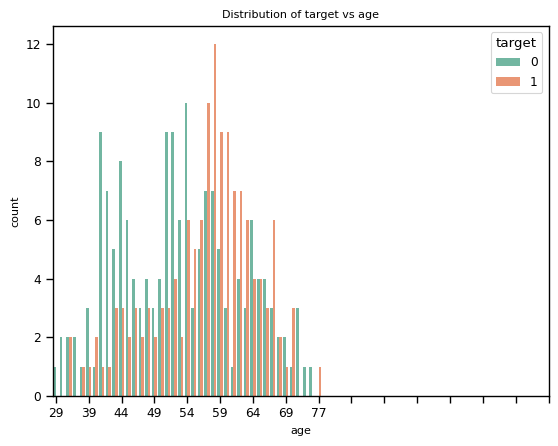

In [ ]:
# distribution of target vs age
#.         Your code here ******************
sns.set_context("paper", font_scale=1, rc={"font.size": 8, "axes.titlesize": 8, "axes.labelsize": 8})
#sns.set_style("white")
ax = sns.countplot(x="age", hue="target", data=df,order=df['age'].sort_values().unique(),  palette="Set2")
#ax = sns.countplot( x="age", hue="target", data=df,order=df['age'].sort_values().unique())
#ax.set(xticklabels=[])
ax = ax.set_xticks(np.arange(0, 80, 5))
plt.title('Distribution of target vs age')
plt.show()

## Bài tập 2: (Data Analysis) hãy hoàn thiện chương trình sau sử dụng thư viện seaborn để hiện thị mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


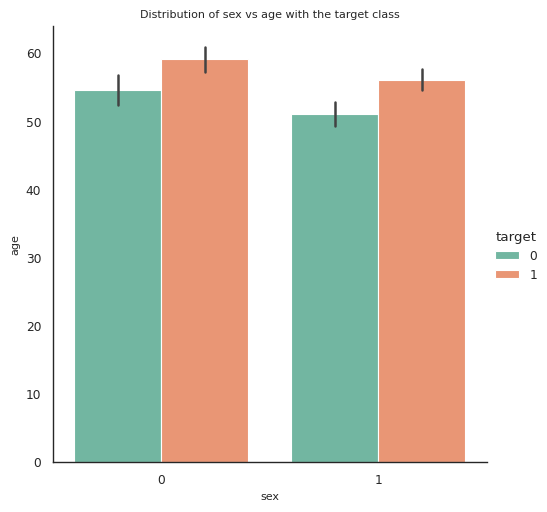

In [ ]:
# bai tap 2
# barplot of age vs sex with hue = target

#.         Your code here ******************

sns.catplot( kind="bar", data=df,y="age", x="sex",hue='target',  palette="Set2")
plt.title('Distribution of sex vs age with the target class')
plt.show()

## Bài tập 3: (sử dụng KNN cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật KNN để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#########################################   KNeighborsClassifier   ###########################################################
#Bai tap 3
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
#.         Your code here ******************
from sklearn.neighbors import KNeighborsClassifier

# define the model
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)


In [ ]:
# Đồ thị thể hiện mỗi quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


## Bài tập 4: (sử dụng SVM cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật SVM để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = ’rbf’, random_state=42

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#########################################   SVM   #############################################################
#Bai Tap 4
#.         Your code here ***********
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)



In [ ]:

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))



Accuracy for training set for SVC = 0.66
Accuracy for test set for SVC = 0.67


## Bài tập 5: (sử dụng Naive Bayes cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Naive Bayes để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = ’rbf’, random_state=42

In [ ]:
#########################################   Naive Bayes  #############################################################
# Bai tap 5

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#.         Your code here ******************
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# comfusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)



In [ ]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))


Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.84


## Bài tập 6: (sử dụng Decision Tree cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Decision Tree để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: criterion=’gini’, max_depth=10, min_samples_split=2

In [ ]:
#Bai tap 6
#########################################   Decision Tree  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#.         Your code here ******************
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth=10, min_samples_split=2)
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)


In [ ]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.77


## Bài tập 7: (sử dụng Random Forest cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Random Forest để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: criterion=’gini’, max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42

In [ ]:
#########################################  Random Forest  #############################################################
#bai tap 7

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#.         Your code here *****************
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)


In [ ]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for RandomForestClassifier = 0.98
Accuracy for test set for RandomForestClassifier = 0.8


## Bài tập 8: (sử dụng Adaboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Adaboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: n_estimators=50, learning_rate=1.0

In [9]:
# bap tap 8
######################### applying Adaboost ##########################################

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#.         Your code here ******************
from sklearn.ensemble import AdaBoostClassifier
# define the model
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [10]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for test set for AdaBoostClassifier = 0.84


## Bài tập 9: (sử dụng GradientBoost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật GradientBoost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42

In [12]:
# Bai tap 9
################### Gradient Adaboost #####################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#.Your code here ******************
from sklearn.ensemble import GradientBoostingClassifier

# define the model
classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)

classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# comfusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

In [13]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.85


## Bài tập 10: (sử dụng XGboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật XGboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: objective="binary:logistic", random_state=42, n_estimators = 100

In [14]:
#bai tap 10
################### applying XGBoost #######################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#.         Your code here ******************
from xgboost import XGBClassifier

# define the model
classifier = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)

classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# comfusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

In [15]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.87


## Bài tập 11: (sử dụng kỷ thuật Stacking cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng kỹ thuật Stacking để dự đoán bệnh nhân có khả bị bệnh tim hay bằng cách dùng phương pháp stacking sử dụng heterogeneous approach với mô hình giải thuật được thể hiện ở hình 1.

In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# import the modules for all the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

dtc =  DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn =  KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

#.         Your code here ******************
clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn),  ('gc', gc), ('svc', svc), ('ad', ad)]
xg = XGBClassifier()
stack = StackingClassifier(estimators=clf, final_estimator=xg)
stack.fit(X_train, y_train)

# predict
y_pred = stack.predict(X_test)
y_pred_train = stack.predict(X_train)

# comfusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

In [23]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for StackingClassifier = 0.92
Accuracy for test set for StackingClassifier = 0.9
